
# Ford GoBike System Data Exploration
## by Soumyadip Guha

<div style="font-size:18px">
    
## About Dataset    

   Here we analyze Bay Wheels(previously known as Ford GoBike) System data. Bay Wheel is a regional public bicycle sharing system in the San Francisco Bay Area, California. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California. The dataset used for this exploratory analysis consists of monthly trip data from January 2019 to December 2019 covering the greater San Francisco Bay area. The dataset basically is the trip records under Bay Wheel.

<div style="font-size:18px">
    
## Dataset Exploration
By exploring the dataset we find some interesting facts about the dataset. Those may be helpful for Bay Wheel to improve their business policy. Here we find the answers of some interesting questions about the dataset.

</br>

In [1]:
# Import all the necessary python libraries for the exploration for plotting the visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
from zipfile import ZipFile
import glob

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Read data from csv file
df = pd.read_csv('trip_clean_19.csv')


In [3]:
# Here we set the values to the variables which will be used in the following analysis.
# Set base color for univariate exploration.
base_color = sb.color_palette()[0]

# Set the orders for categorical variables that will be used later.

month_order=['January','February','March','April','May','June','July','August','September','October','November','December']

season_order = ['Summer', 'Autumn', 'Winter', 'Spring']

day_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Set ticks and tick_lable for start_hour.
hour_ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
hour_ticks_labels = ["0am", "1am", "2am", "3am", "4am", "5am", "6am", "7am", "8am", "9am", "10am", "11am", "12pm",
                  "13pm", "14pm", "15pm", "16pm", "17pm", "18pm", "19pm", "20pm", "21pm", "22pm", "23pm"]

# Set the ticks and tick_lable for season.
season_ticks = [0,1,2,3]
season_ticks_label = ['Summer \n (Jun,Jul,Aug)', 'Autumn \n (Sep,Oct,Nov)', 
              'Winter \n (Dec,Jan,Feb)', 'Spring \n (Mar,Apr,May)']


<div style="font-size:18px">

### How number of trips and average trip duration change with months?

> - Basically there is no fixed trends of numer of rides over the year. Though in the month of 'July' we see highest number of rides and in the month of 'December' least number of rides.
- Average trip duration is more or less same over the year, but we see less average trip duration in 'February'.


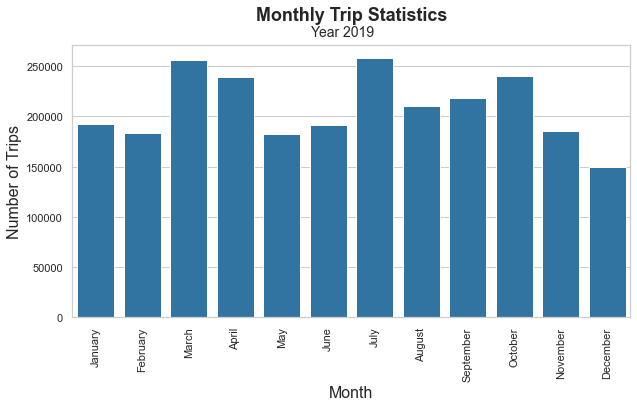

In [5]:
# See monthly statistics of trip demands.

month_order=['January','February','March','April','May','June','July','August','September','October','November','December']
sb.countplot(data=df, x='start_month', order=month_order, color=base_color);

# Set the size and background of the plot
sb.set(rc={'figure.figsize':(10,5)});
sb.set_style('whitegrid');

#for better visbility rotating the ticks by 90
plt.xticks(rotation=90);
plt.xlabel('Month', fontsize=16);
plt.ylabel('Number of Trips', fontsize=16);
plt.title('Monthly Trip Statistics', y=1.07, fontsize=18, fontweight='bold');
plt.suptitle('\nYear 2019\n\n', fontsize=14);


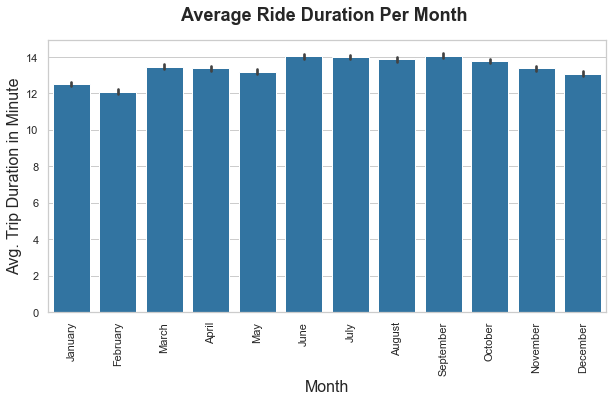

In [6]:
# See how the trip duration varies with month.
sb.barplot(data=df, x='start_month', y='duration_minute', color=base_color, order=month_order);
plt.xticks(rotation=90);
plt.xlabel('Month', fontsize=16);
plt.ylabel('Avg. Trip Duration in Minute', fontsize=16);
plt.title('Average Ride Duration Per Month ', y=1.05, fontsize=18, fontweight='bold');


<div style="font-size:18px">

### Is season make any impact over riders??
> - 'Spring' is more cofortable for riders to ride and 'Winter' is less preferable to ride.
- We see average trip duration in Summer is more than that in other seasons.
- We can see seasonal changes can not alter rush hours. Rush hours remain as it is over the seasons.

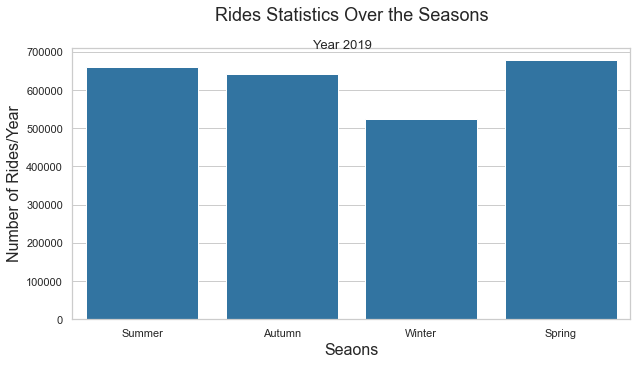

In [11]:
# See the statistics of rides in the seasons. See is seasons make impact the interest of riders to ride??

season_order = ['Summer', 'Autumn', 'Winter', 'Spring']
sb.countplot(data=df, x='season', order=season_order, color=base_color);

# Set the figure size and label the plot
sb.set(rc={'figure.figsize':(10,5)});
sb.set_style('whitegrid');
plt.title('Rides Statistics Over the Seasons\n', fontsize=18);
plt.suptitle('\n\nYear 2019\n', fontsize=13);
plt.xlabel('Seaons', fontsize=16);
plt.ylabel('Number of Rides/Year', fontsize=16);



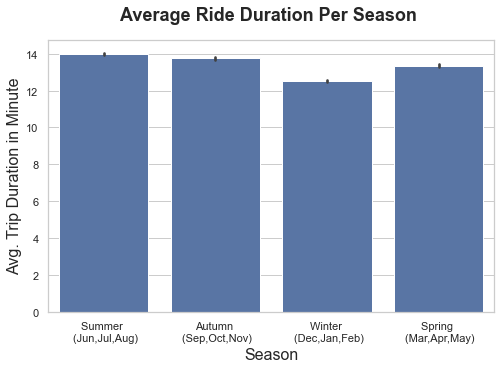

In [14]:
# See how the trip duration varies with season.
plt.figure(figsize=(8,5));
sb.barplot(data=df, x='season', y='duration_minute', color=base_color, order=season_order);
plt.xticks(season_ticks, season_ticks_label);
plt.xlabel('Season', fontsize=16);
plt.ylabel('Avg. Trip Duration in Minute', fontsize=16);
plt.title('Average Ride Duration Per Season ', y=1.05, fontsize=18, fontweight='bold');


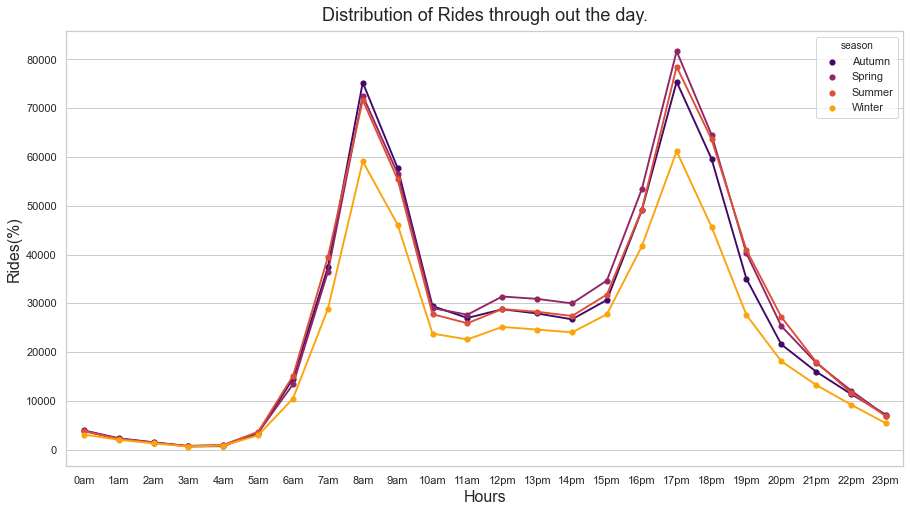

In [15]:
# Creta a new dataframe for pointplot
season_df = df.groupby(['start_hour', 'season']).size().reset_index();

# Plot a pointplot for horly trip visualization.
plt.figure(figsize=(15,8));
sb.pointplot(data=season_df, x='start_hour', y=0,hue='season', scale=.7, palette=['#410967', '#932567', '#DC5039', '#FBA40A']);

plt.title('Distribution of Rides through out the day.', fontsize=18, y=1.01);
plt.xlabel('Hours', fontsize=16);
plt.ylabel('Rides(%)', fontsize=16);

plt.xticks(hour_ticks,hour_ticks_labels);


<div style="font-size:18px">

### Now see weekly statistics of rides
> - During the weekends the demands decreases almost 50%. And we see least demand on Sunday of the Week. On Tuesday we have highest demands.
- Around 80% of bike rides happen during working days(from Monday to Friday) and only 20% on weekends(Satarday and Sunday).
- On weekends people more likely to ride more times. Reason may be they have more free times on the weekends.


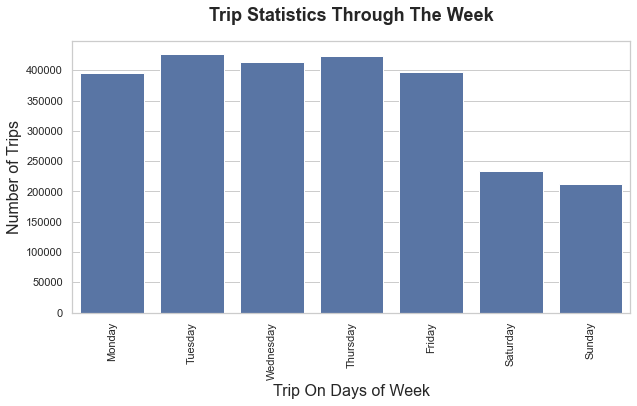

In [16]:
# Now see weekly report about the trip. Is this service during weekends less demanding??
sb.countplot(data=df, x='start_weekday', color=base_color, order=day_order);
plt.xlabel('Trip On Days of Week', fontsize=16);
plt.xticks(rotation=90);
plt.ylabel('Number of Trips', fontsize=16);
plt.title('Trip Statistics Through The Week', y=1.05, fontsize=18, fontweight='bold');


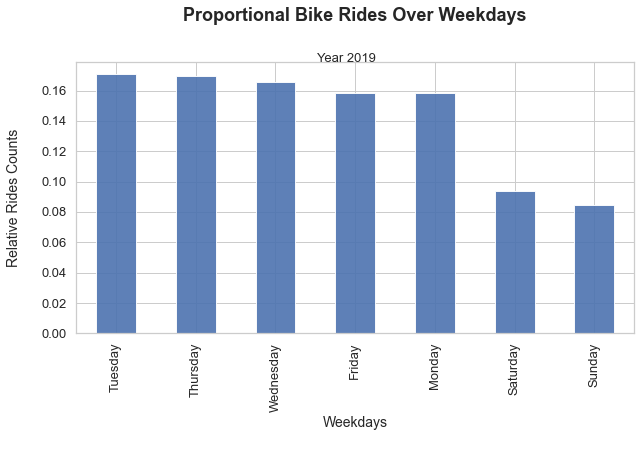

In [17]:
# Make a plot with relative frequency for weekly rides statistics.
# Get relative frequency
n_points = df.shape[0]
rel_fre = df.start_weekday.value_counts() / n_points

# Make the plot.
rel_fre.plot(kind='bar', fontsize=13, alpha=0.9);

# Label the plot.
plt.title('Proportional Bike Rides Over Weekdays\n', y=1.05, fontsize=18, fontweight='bold');
plt.suptitle('\n\nYear 2019\n', fontsize=13);
plt.xlabel('Weekdays\n', fontsize=14);
plt.ylabel('Relative Rides Counts\n', fontsize=14);


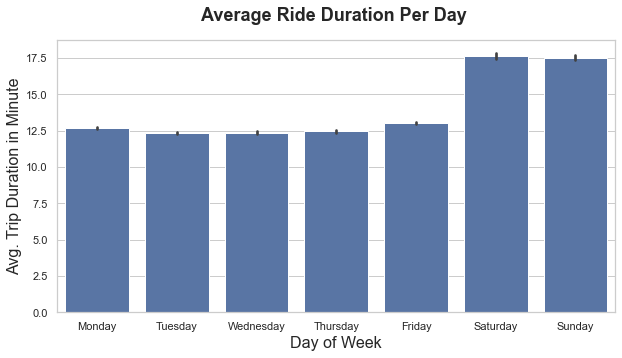

In [18]:
# Create a bar plot to see how ride duration varies with weekdays.
sb.barplot(data=df, x='start_weekday', y='duration_minute', color=base_color, order=day_order);

sb.set(style='whitegrid', rc={'figure.figsize':(10,5)});
plt.xlabel('Day of Week', fontsize=16);
plt.ylabel('Avg. Trip Duration in Minute', fontsize=16);
plt.title('Average Ride Duration Per Day ', y=1.05, fontsize=18, fontweight='bold');


<div style="font-size:18px">

### Now give a look on distribution of rides over the hours of day
> - There are two rush hours 8A.M. and 5P.M.
- From starting of a day to 4A.M. we see less amount of rides. And most of rides around 85% happen from 7A.M. to 19P.M.



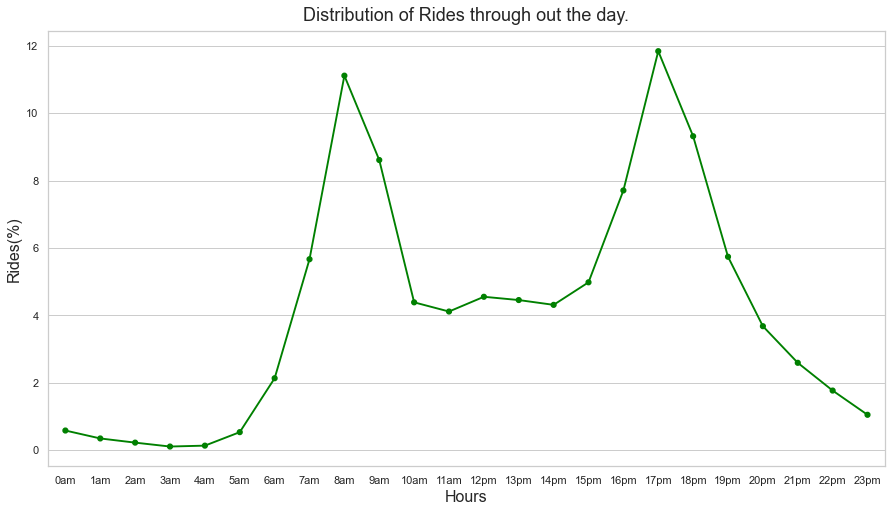

In [20]:
# Create a new dataframe for pointplot.
hour_df = df.groupby('start_hour').agg({'bike_id':'count'}).reset_index()
hour_df['bike_id'] = (hour_df['bike_id']/hour_df['bike_id'].sum())*100

# Plot a pointplot for horly trip visualization.
plt.figure(figsize=(15,8))
sb.pointplot(data=hour_df, x='start_hour', y='bike_id', scale=.7, color='green');

plt.title('Distribution of Rides through out the day.', fontsize=18, y=1.01);
plt.xlabel('Hours', fontsize=16);
plt.ylabel('Rides(%)', fontsize=16);

plt.xticks(hour_ticks,hour_ticks_labels);


<div style="font-size:18px">

### Now see distribution of user types and their trip duration
> - Most users are subscribers of Bay Wheel around 80.6%
- Customer segment consists of only 19.4% of the rides.
- Though customers consists of small part of rides, average trip durations of customers is around **2** times of average trip duration of subscribers.


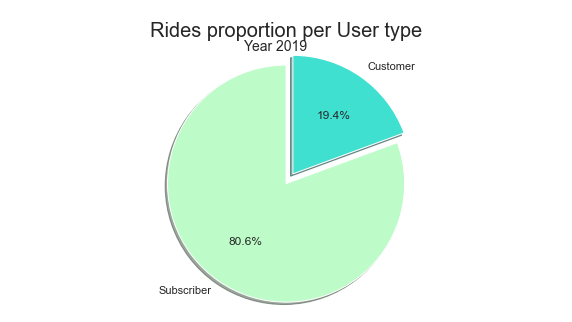

In [22]:
# Draw a pie chart for user_type visualization.
plt.figure(figsize=(10,5));
colors = ['#BDFCC9','#40E0D0','#00C5CD', '#B0E0E6', '#AEEEEE']

user_type = df.user_type.value_counts()
explode = (0, 0.1) 
plt.pie(user_type, explode=explode, labels=user_type.index, colors=colors, shadow=True, autopct='%1.1f%%', startangle=90);

plt.axis('equal'); # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Rides proportion per User type', fontsize=20);
plt.suptitle('\n\nYear 2019 \n',fontsize=14);


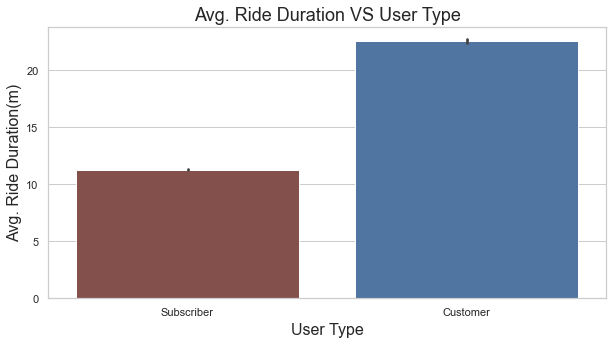

In [37]:
# See average ride duration by user_type. See which type users are more likely to ride more time.
plt.figure(figsize=(10,5))
sb.barplot(data=df, x='user_type', y='duration_minute', palette=['#8C4843','#4274AD']);

plt.xlabel('User Type', fontsize=16);
plt.ylabel('Avg. Ride Duration(m)', fontsize=16);
plt.title('Avg. Ride Duration VS User Type', fontsize=18);


<div style="font-size:18px">

### See Start And End Station Statistics

There are 447 starting and ending stations available. Among them top 5 most popular starting statons are -
`Market St at 10th St`,`San Francisco Caltrain Staion 2`, `San Francisco Caltrain`, `San Francisco Ferry Building`, `Berry St at 4th St`.

There are 5 stations which riders choose as starting_station or ending_station less than 5 times in a year. These stations are -`Philly Demo`, `San Jose Depot`, `Mercado Way at Sierra Rd`, `Prototype Lab`, `Howard workshop`.

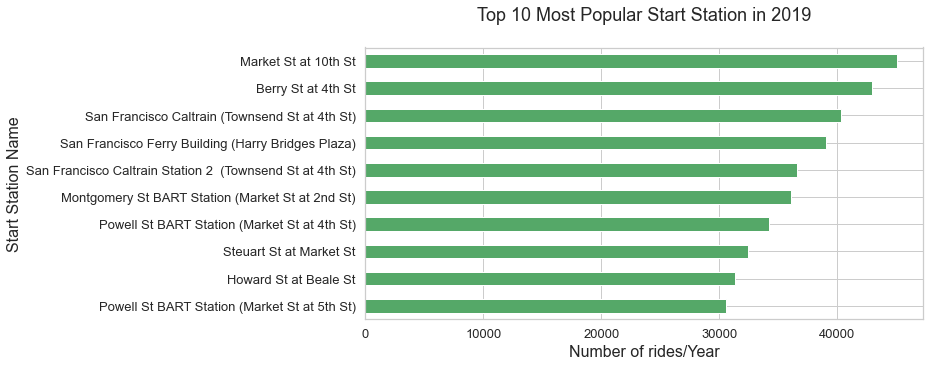

In [32]:
# Get the top 30 most popular start_station_name.
df.start_station_name.value_counts().head(10).sort_values().plot(kind='barh', fontsize=13, figsize=(10,5), color='g');

plt.xlabel('Number of rides/Year', fontsize=16);
plt.ylabel('Start Station Name', fontsize=16);
plt.title('Top 10 Most Popular Start Station in 2019\n', fontsize=18);


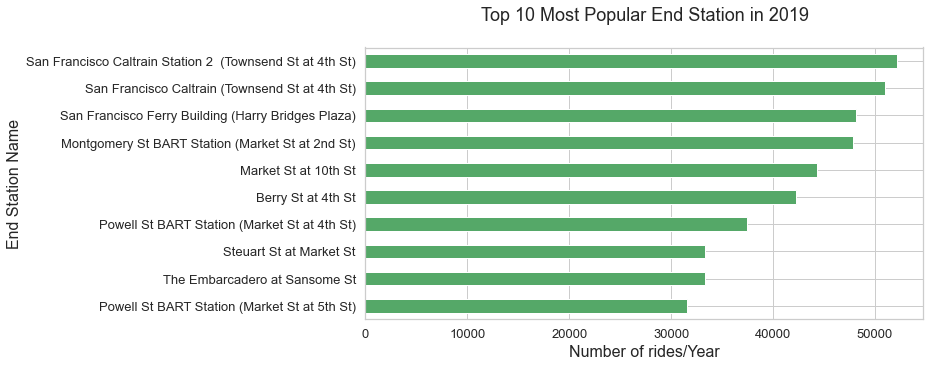

In [33]:
# Get the top 30 most popular start_station_name.
df.end_station_name.value_counts().head(10).sort_values().plot(kind='barh', fontsize=13, figsize=(10,5), color='g');

plt.xlabel('Number of rides/Year', fontsize=16);
plt.ylabel('End Station Name', fontsize=16);
plt.title('Top 10 Most Popular End Station in 2019\n', fontsize=18);


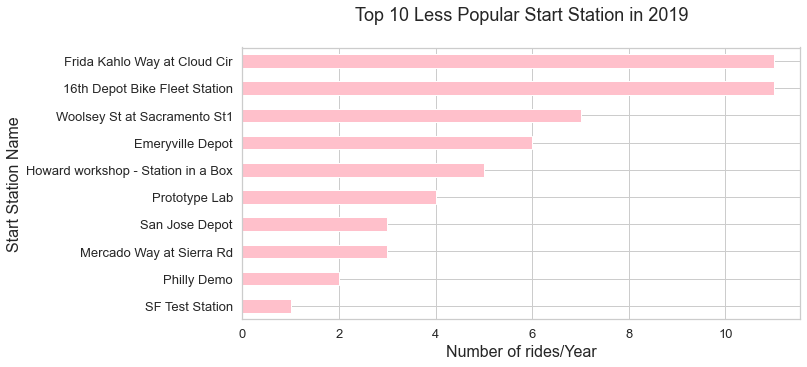

In [30]:
# Get the top 20 least popular start_station_name.
df.start_station_name.value_counts().sort_values().head(10).plot(kind='barh', fontsize=13, figsize=(10,5), color='pink');

plt.xlabel('Number of rides/Year', fontsize=16);
plt.ylabel('Start Station Name', fontsize=16);
plt.title('Top 10 Less Popular Start Station in 2019\n', fontsize=18);


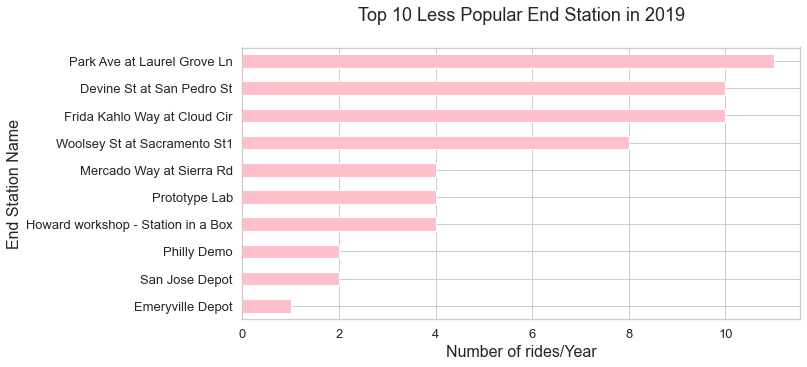

In [31]:
# Get the top 20 least popular start_station_name.
df.end_station_name.value_counts().sort_values().head(10).plot(kind='barh', fontsize=13, figsize=(10,5), color='pink');

plt.xlabel('Number of rides/Year', fontsize=16);
plt.ylabel('End Station Name', fontsize=16);
plt.title('Top 10 Less Popular End Station in 2019\n', fontsize=18);


<div style="font-size:18px">

### Monthly Trend of Rides by User Type
> - From 'May' to 'December' ther is an upward trend of rides by customers. So we can say that Bay Weel is being popular to the customers. And for subscribers there is an up and down trend through out the year 2019.

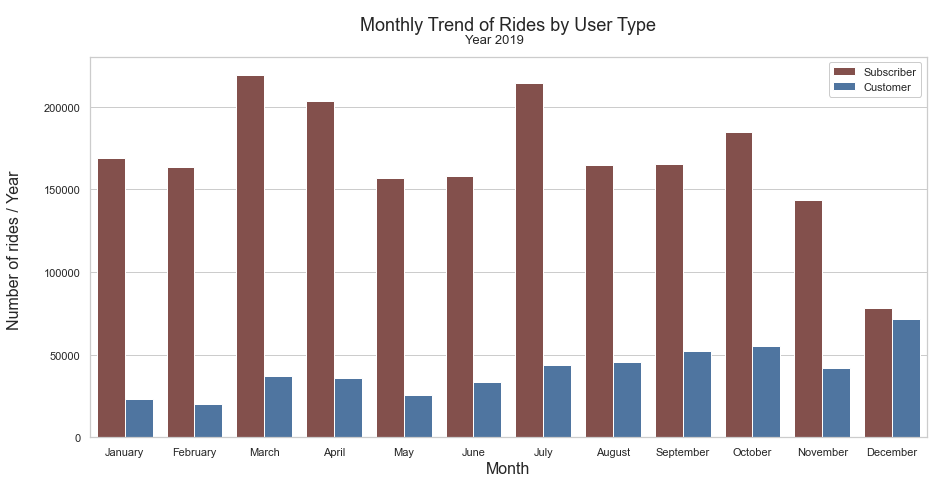

In [35]:
# See the trends of trip by user_type. See how trips are varied with user_type from month to month.
ax = sb.countplot(data=df, x='start_month', hue='user_type', order=month_order, palette=['#8C4843','#4274AD']);

# Set style and label the plot
sb.set(rc={'figure.figsize':(15,7)}, style='whitegrid');
plt.title('Monthly Trend of Rides by User Type\n', fontsize=18);
plt.suptitle('\n\nYear 2019\n',fontsize=13);
plt.xlabel('Month', fontsize=16);
plt.ylabel('Number of rides / Year \n',fontsize=16);
ax.legend(loc = 1, framealpha = 1); 


<div style="font-size:18px">

### Weekly Trend of Rides by User Type
> - Rides by subscriber are always greater than rides by customers. And rides by customers are more or less same through out the week.

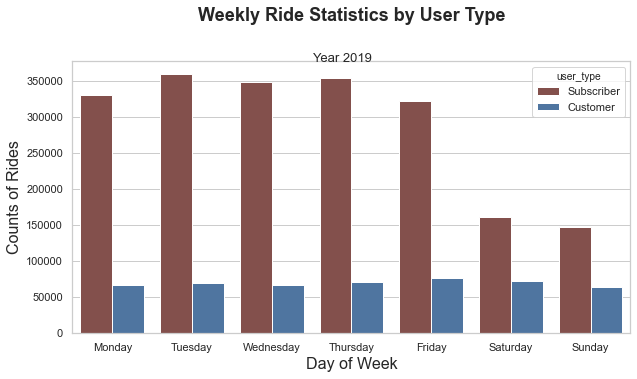

In [36]:
# See weekly rides trend by user_type.
fig=plt.figure(figsize=(10,5))
sb.countplot(data=df, x='start_weekday', hue='user_type',order=day_order, palette=['#8C4843','#4274AD']);

# Set the style and label the plot.
plt.xlabel('Day of Week', fontsize=16);
plt.ylabel('Counts of Rides', fontsize=16);
plt.title('Weekly Ride Statistics by User Type\n', y=1.05, fontsize=18, fontweight='bold');
plt.suptitle('\n\nYear 2019\n', fontsize=13);


<div style="font-size:18px">

### Average Trip Duration by Users Over The Week

>- Though on weekends subscribers ride less, the subscribers who ride on weekends ride for comparetively long time than they ride for on working days. And Average ride time for customers is always greater than that of subscribers.


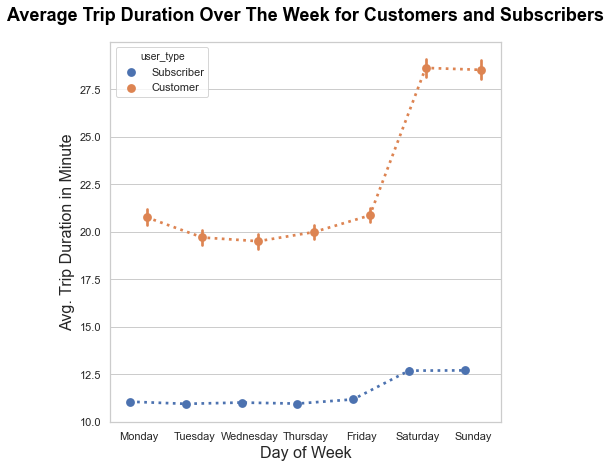

In [38]:
# Make a plot to visualize the relationships between the three variables.
fig=plt.figure(figsize=(7,7))
sb.pointplot(data=df, x='start_weekday', y='duration_minute', hue='user_type', dodge=0.3, linestyles=":",order=day_order);

plt.title("Average Trip Duration Over The Week for Customers and Subscribers", fontsize=18,
          y = 1.04, fontweight='bold', color = 'black')
plt.xlabel('Day of Week', fontsize=16);
plt.ylabel('Avg. Trip Duration in Minute', fontsize=16);


</br>

<div style="font-size:18px">
    

### Conclusions:

Here we explore Bay Wheel's System dataset. This organisation operates ride service in the California Bay Area. Here we analyse Bay Wheel's 2019 trip dataset that consists of around 2.5M rides details. We find some interesting facts about the dataset. We see during working days demands more their ride services than weeends. 80% of their rides booked on working days and 20% on weekends. Their services being popular among the customer users. Spring time is the most comfortable season to riders to ride. On Tuesday of the week Bay Wheel see high demands through out the week. Two peak hours are 8A.M. and 5P.M. we assume that this is due to working time or office time.



</div>